<a href="https://colab.research.google.com/github/Fazirasulong/Mathematic-and-Statistics-Programming-1-67/blob/main/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# โหลด libraries ที่จำเป็น
library(ggplot2)
library(pROC)

# 1. โหลดข้อมูล Exam_score.csv
exam_data <- read.csv("Exam_score.csv")

# 2. โหลดข้อมูล rta.csv
# เราจะกำหนดให้ "NA" และ "don't know" ถูกอ่านเป็นค่าว่าง (NA)
rta_data <- read.csv("rta.csv", na.strings = c("NA", "don't know"))

# แสดงตัวอย่างข้อมูลเพื่อตรวจสอบ
print("--- ข้อมูล Exam_score.csv ---")
head(exam_data)

print("--- ข้อมูล rta.csv ---")
head(rta_data)

[1] "--- ข้อมูล Exam_score.csv ---"


,ID,Exam_score,Sleeping,Reading,Chatting
,<int>,<int>,<int>,<int>,<int>
1,1,90,7,4,1
2,2,80,5,3,2
3,3,65,5,2,3
4,4,74,6,3,4
5,5,60,7,1,4
6,6,76,6,4,3


[1] "--- ข้อมูล rta.csv ---"


,id,region,sex,age,vehicle,type,safety,alcohol,status,fest
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Central,Female,46,other,NA,NA,no,1,Songkran
2,2,Northeast,Male,30,car,driver,not wear,NA,0,Songkran
3,3,Northeast,Male,21,car,driver,not wear,yes,0,Songkran
4,4,Northeast,Male,68,other,NA,NA,no,0,Songkran
5,5,Northeast,Male,40,other,passenger,not wear,yes,0,Songkran
6,6,Northeast,Male,53,car,driver,NA,yes,1,Songkran


`geom_smooth()` using formula = 'y ~ x'


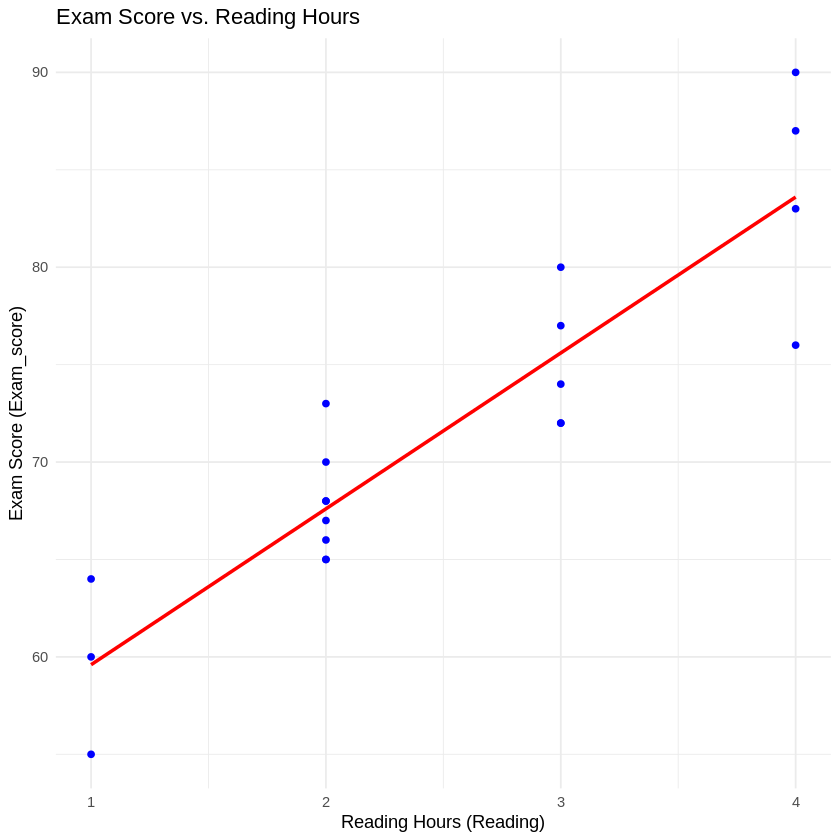

In [ ]:
# พล็อตกราฟความสัมพันธ์ระหว่าง Reading และ Exam_score
ggplot(exam_data, aes(x = Reading, y = Exam_score)) +
  geom_point(color = "blue") +  # จุดข้อมูล
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # เส้น regression
  labs(title = "Exam Score vs. Reading Hours",
       x = "Reading Hours (Reading)",
       y = "Exam Score (Exam_score)") +
  theme_minimal()

In [ ]:
# สร้างโมเดล Simple Linear Regression
model_slr <- lm(Exam_score ~ Reading, data = exam_data)

# แสดงผลสรุปโมเดล
summary(model_slr)


Call:
lm(formula = Exam_score ~ Reading, data = exam_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.60  -2.60  -0.10   2.65   6.40 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.6000     2.3070  22.367 1.39e-14 ***
Reading       8.0000     0.8598   9.305 2.67e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.748 on 18 degrees of freedom
Multiple R-squared:  0.8279,	Adjusted R-squared:  0.8183 
F-statistic: 86.58 on 1 and 18 DF,  p-value: 2.674e-08


In [ ]:
# สร้างโมเดล Multiple Linear Regression
model_mlr <- lm(Exam_score ~ Reading + Sleeping + Chatting, data = exam_data)

# แสดงผลสรุปโมเดล
summary(model_mlr)


Call:
lm(formula = Exam_score ~ Reading + Sleeping + Chatting, data = exam_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5201 -1.9718 -0.1758  1.6679  5.5408 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.9508     6.2687   9.883 3.24e-08 ***
Reading       7.0305     0.8063   8.719 1.78e-07 ***
Sleeping     -0.4177     0.8840  -0.472   0.6430    
Chatting     -2.0155     0.7079  -2.847   0.0116 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.164 on 16 degrees of freedom
Multiple R-squared:  0.891,	Adjusted R-squared:  0.8705 
F-statistic: 43.58 on 3 and 16 DF,  p-value: 6.337e-08


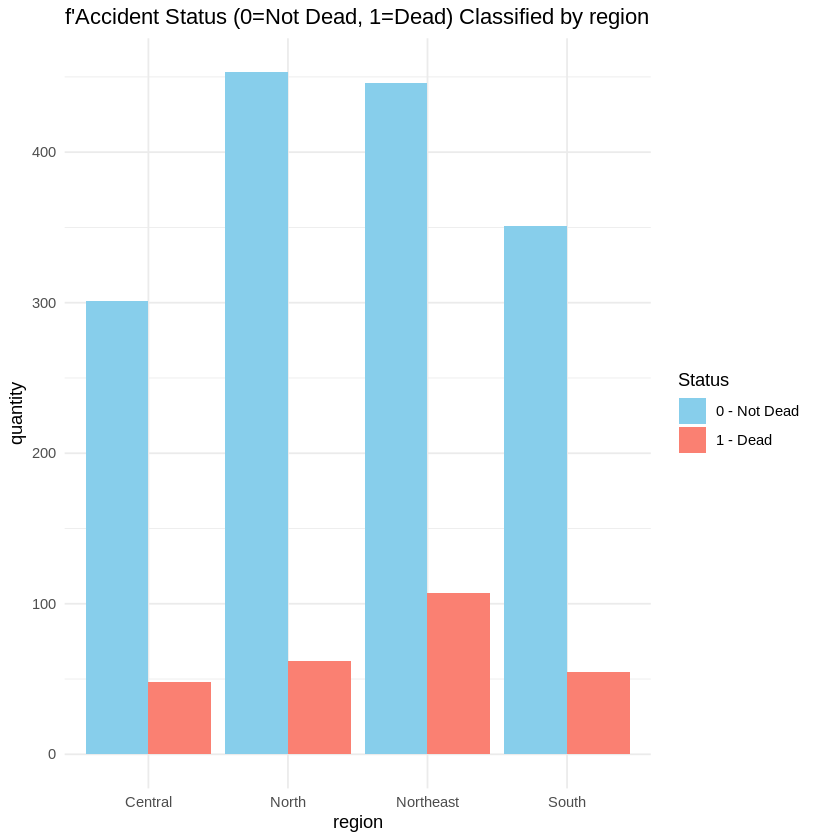

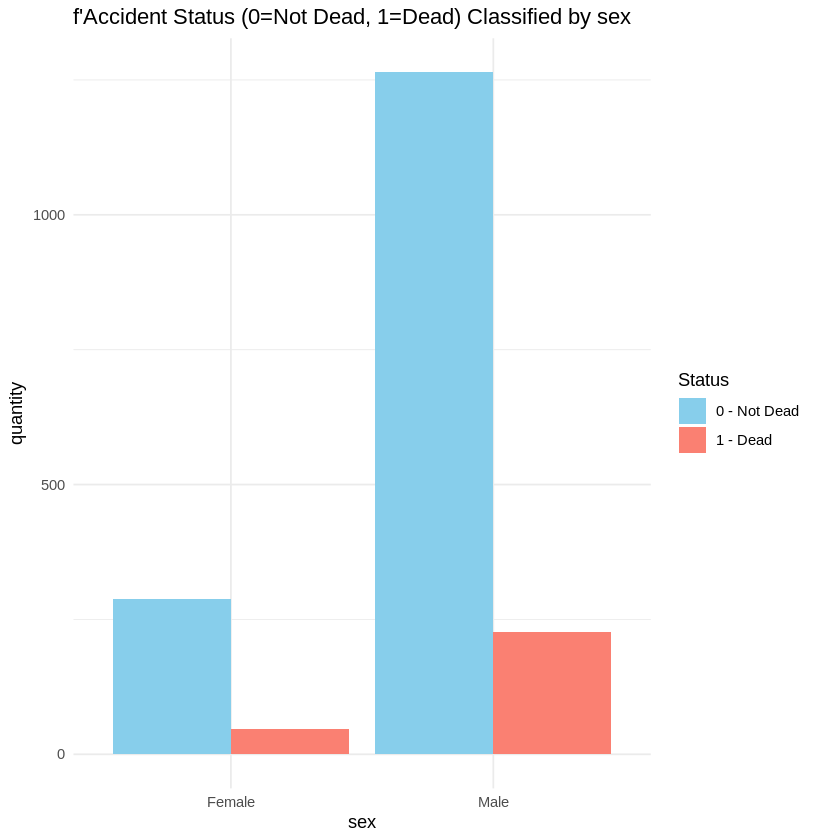

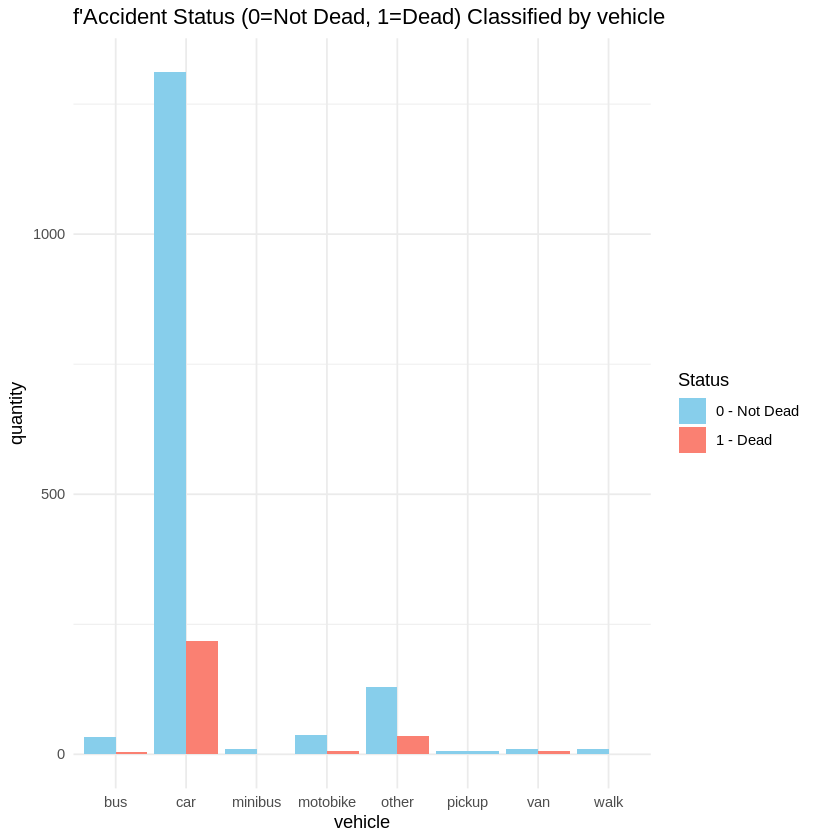

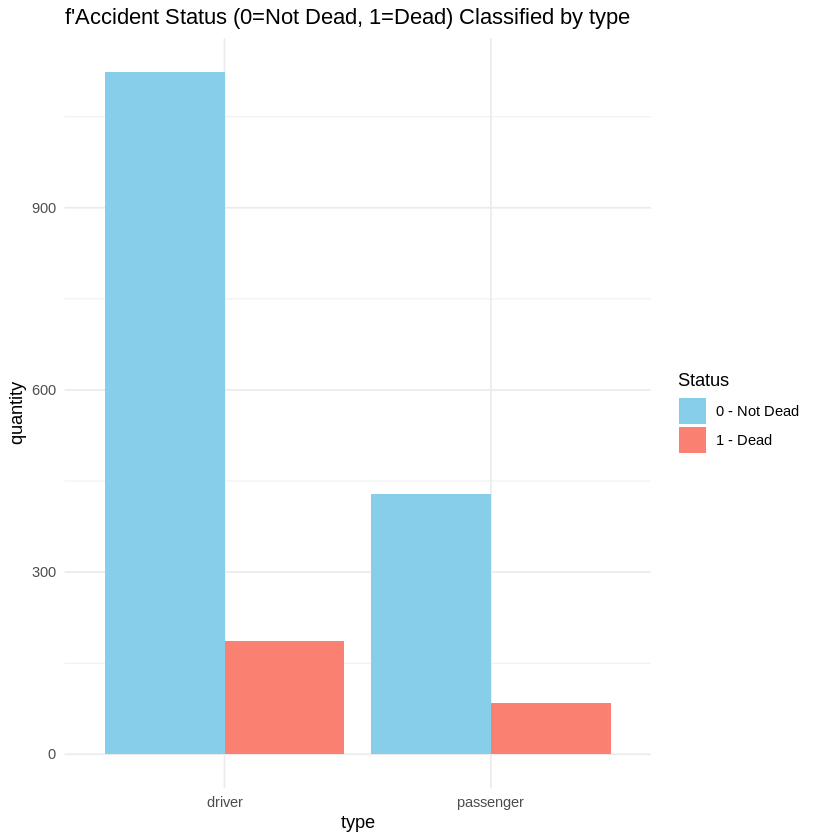

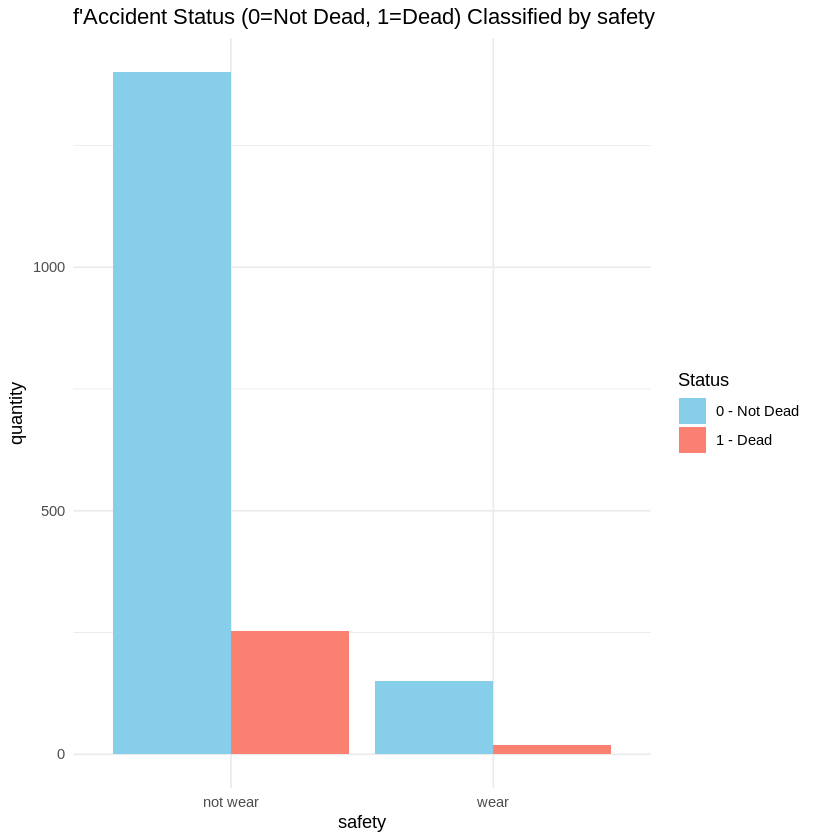

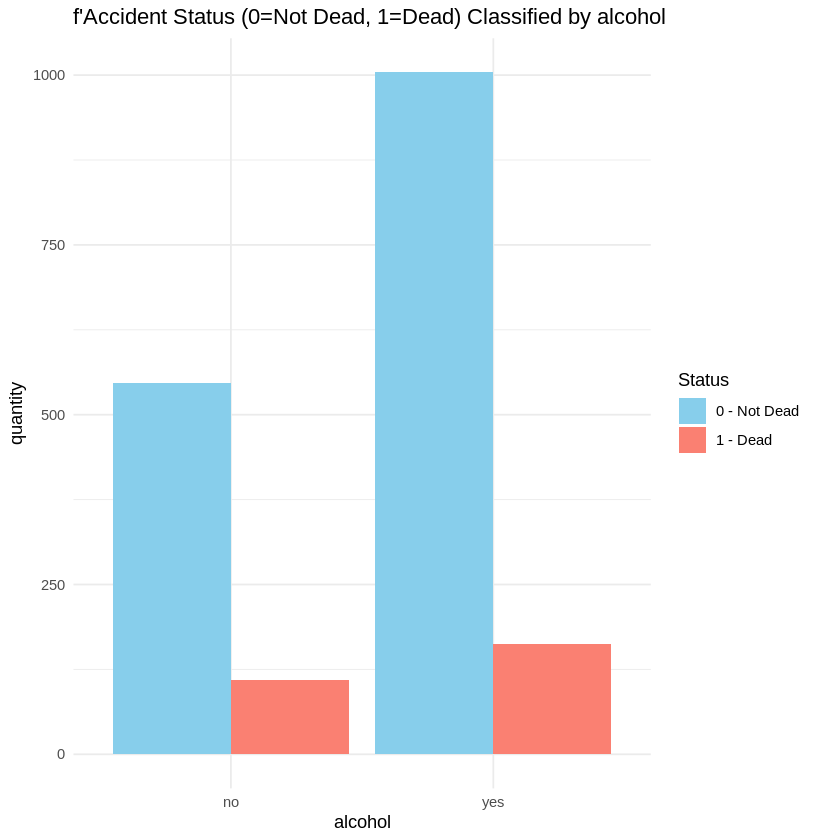

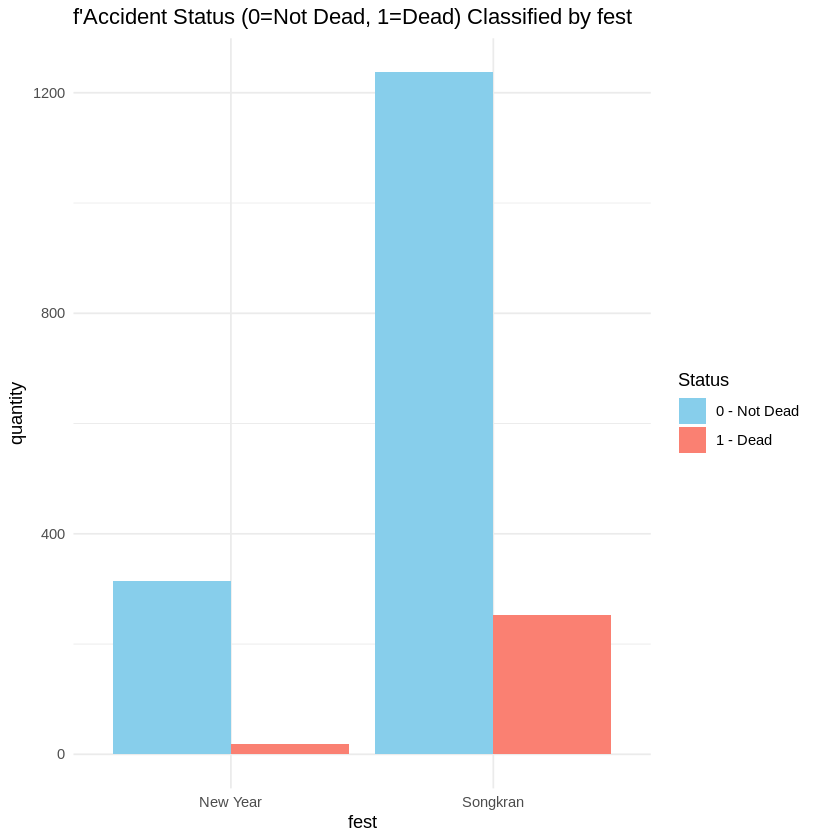

In [ ]:
# ลบแถวที่มีค่าว่าง (NA) ออกจากข้อมูลก่อน เพื่อให้พล็อตและสร้างโมเดลได้
# เราจะเลือกเฉพาะคอลัมน์ที่จะใช้ในโมเดลมาลบ NA
model_vars <- c('status', 'region', 'sex', 'age', 'vehicle', 'type', 'safety', 'alcohol', 'fest')
rta_cleaned <- na.omit(rta_data[, model_vars])

# แปลง status ให้เป็น factor (ตัวแปรกลุ่ม) เพื่อให้กราฟและโมเดลเข้าใจ
rta_cleaned$status <- as.factor(rta_cleaned$status)

# ตัวแปรกลุ่มที่เราจะพล็อต
categorical_vars <- c('region', 'sex', 'vehicle', 'type', 'safety', 'alcohol', 'fest')

# วนลูปสร้างกราฟทีละตัวแปร
for (var in categorical_vars) {
  plot <- ggplot(rta_cleaned, aes_string(x = var, fill = "status")) +
    geom_bar(position = "dodge") + # "dodge" คือการวางแท่งข้างกัน
    labs(title = paste("f'Accident Status (0=Not Dead, 1=Dead) Classified by", var),
         x = var,
         y = "quantity",
         fill = "Status ") +
    scale_fill_manual(values = c("0" = "skyblue", "1" = "salmon"),
                      labels = c("0 - Not Dead", "1 - Dead")) +
    theme_minimal()

  print(plot) # แสดงกราฟ
}

In [ ]:
# สร้างโมเดล Logistic Regression
# ใช้ข้อมูล rta_cleaned ที่ลบ NA ออกแล้ว
model_logit <- glm(status ~ region + sex + age + vehicle + type + safety + alcohol + fest,
                   data = rta_cleaned,
                   family = binomial(link = "logit"))

# แสดงผลสรุปโมเดล
summary(model_logit)


Call:
glm(formula = status ~ region + sex + age + vehicle + type + 
    safety + alcohol + fest, family = binomial(link = "logit"), 
    data = rta_cleaned)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.845897   0.664129  -5.791 7.00e-09 ***
regionNorth      -0.124023   0.210296  -0.590  0.55536    
regionNortheast   0.321248   0.197064   1.630  0.10307    
regionSouth       0.087230   0.219167   0.398  0.69062    
sexMale           0.252807   0.192310   1.315  0.18865    
age               0.019335   0.005054   3.826  0.00013 ***
vehiclecar        0.410644   0.544243   0.755  0.45053    
vehicleminibus   -0.356856   1.181479  -0.302  0.76262    
vehiclemotobike   0.330798   0.681267   0.486  0.62728    
vehicleother      0.730682   0.578942   1.262  0.20691    
vehiclepickup   -12.172399 325.350504  -0.037  0.97016    
vehiclevan        1.310212   0.754254   1.737  0.08237 .  
vehiclewalk       0.632540   1.212969   0.521  0.60203    
t

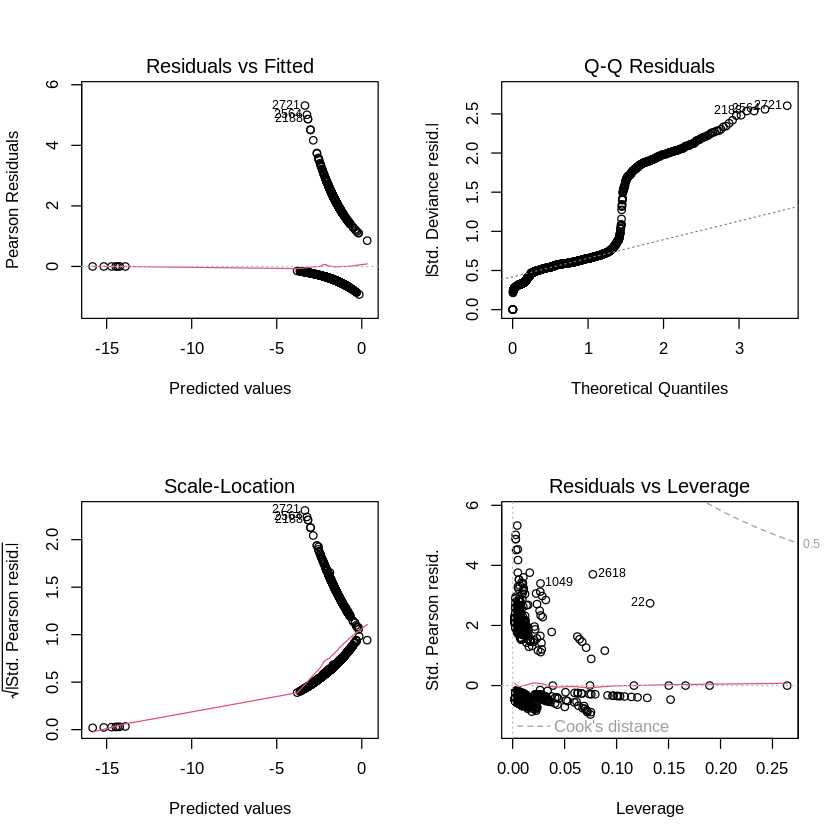

In [ ]:
# ตั้งค่าให้แสดง 4 กราฟในหน้าต่างเดียว (2x2)
par(mfrow = c(2, 2))

# พล็อตกราฟวินิจฉัย
plot(model_logit, which = 1) # Residuals vs Fitted
plot(model_logit, which = 2) # Normal Q-Q
plot(model_logit, which = 3) # Scale-Location
plot(model_logit, which = 5) # Residuals vs Leverage

# ตั้งค่าหน้าต่างกราฟกลับเป็นปกติ (1x1)
par(mfrow = c(1, 1))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



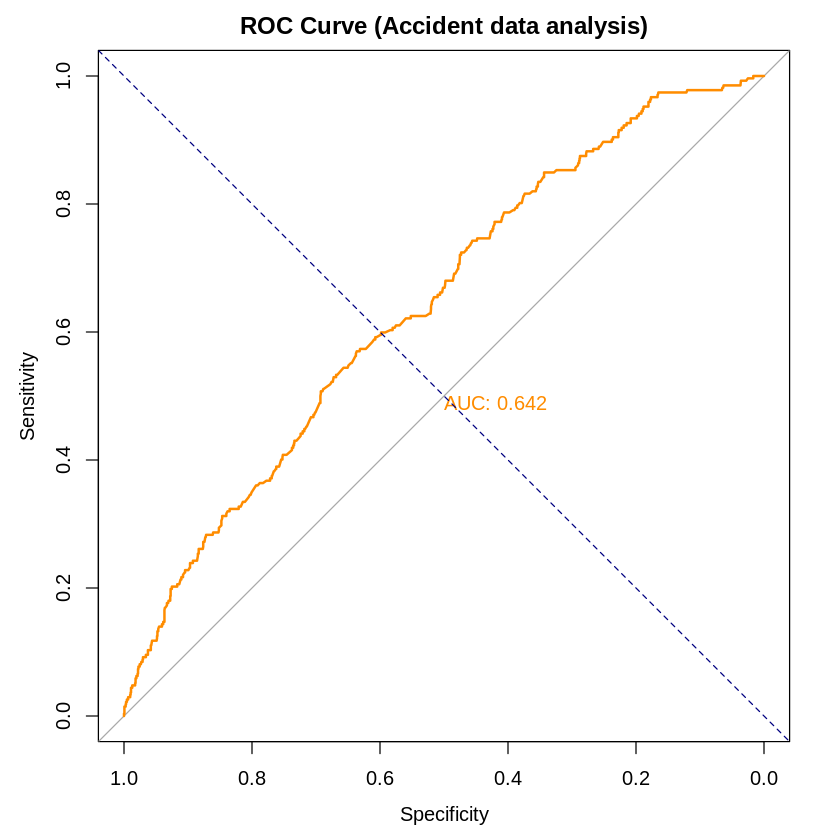

In [ ]:
# โหลด library pROC
library(pROC)

# คำนวณค่าความน่าจะเป็น (Probabilities) ที่จะเกิด status = 1
fitted_probs <- predict(model_logit, type = "response")

# สร้าง ROC curve
roc_curve <- roc(rta_cleaned$status, fitted_probs)

# พล็อต ROC Curve
plot(roc_curve,
     main = "ROC Curve (Accident data analysis)",
     col = "darkorange",
     lwd = 2,
     print.auc = TRUE) # print.auc = TRUE เพื่อแสดงค่า AUC

# เพิ่มเส้นอ้างอิง (การเดาสุ่ม)
abline(a = 0, b = 1, lty = 2, col = "navy") # lty=2 คือเส้นประ